# After Cleaning the table and created a merged table now it is table to start visualisation our Data

# *    Import All needed library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *    Import DF



*    Import table merged that was created before by merging the relevant data in DF : order, order_line and products  
*   import table Brand

    



In [2]:


url = "https://drive.google.com/file/d/1FShGauxCE1bSvIlWAuomEfNgd6QgNwaj/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
merged_data = pd.read_csv(path, parse_dates=['date'])
new_data = merged_data.copy()

In [3]:
# brands_qu.csv
url = "https://drive.google.com/file/d/1t4Tg7y3yuy9sfAcE5tTxXLG_kZgt2XSb/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands_clean = pd.read_csv(path)
brands = brands_clean.copy()

In [29]:
new_data.loc[new_data["category"] == "other", "category"] = "accesories"

# *    Discount average by Season

In [ ]:


new_data['month'] = new_data['date'].dt.month

# Group by month and calculate average discount
avg_discount_by_month = new_data.groupby('month')['discounts'].mean().reset_index()

# Plot using Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_discount_by_month, x='month', y='discounts', marker='o')
plt.title('Average Discount Over the Months')
plt.xlabel('Month')
plt.ylabel('Average Discount')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# *    Revenue by Season

In [ ]:

new_data['season'] = new_data['date'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
                                                    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
                                                    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Group by season and sum revenue
revenue_by_season = new_data.groupby('season')['unit_price'].sum().sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_season.index, y=revenue_by_season.values, palette='Greens')
plt.grid=False
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.show()


In [ ]:
revenue_by_season


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style to white without grid
sns.set_style("white")

new_data['season'] = new_data['date'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
                                                    5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
                                                    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Group by season and sum revenue
revenue_by_season = new_data.groupby('season')['unit_price'].sum().sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_season.index, y=revenue_by_season.values, palette='Greens')
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

# Annotate the value of the Winter bar
winter_revenue = revenue_by_season['Winter']
plt.annotate(f'{winter_revenue:.2f}', xy=('Winter', winter_revenue), xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom')

# Remove the y-axis
plt.gca().axes.get_yaxis().set_visible(False)

plt.show()


# * top selling category

In [ ]:

top_categories = new_data.groupby('category')['product_quantity'].sum()


top_categories = top_categories.sort_values(ascending=False)


top_10_categories = top_categories.head(30)

print(top_10_categories)


# * total product sold by season

<ipython-input-15-bb4637398946>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products_by_season.index, y=products_by_season.values, palette='Greens')


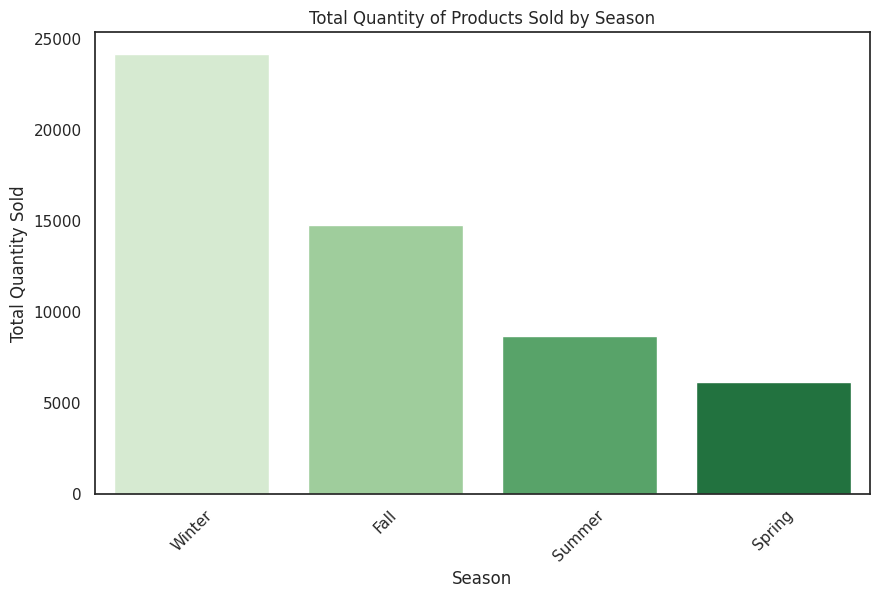

In [15]:

new_data['season'] = new_data['date'].dt.month.map({1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall', 11:'Fall', 12:'Winter'})

products_by_season = new_data.groupby('season')['product_quantity'].sum()


products_by_season = products_by_season.sort_values(ascending=False)

#print(products_by_season)

plt.figure(figsize=(10, 6))
sns.barplot(x=products_by_season.index, y=products_by_season.values, palette='Greens')
plt.xlabel('Season')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity of Products Sold by Season')
plt.xticks(rotation=45)
plt.show()


# * average discount by price category

In [ ]:
new_data.sample(10)

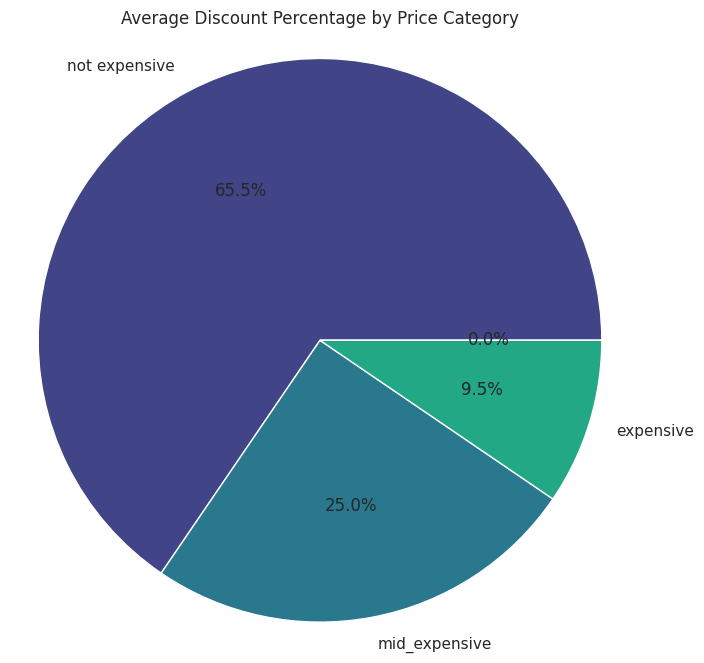

In [14]:


new_data['discount_percentage'] = (new_data['discounts'] / new_data['original_price']) * 100

price_ranges = [0, 300, 700, 1600, float('inf')]
price_labels = ['not expensive', 'mid_expensive', 'expensive', 'very expensive']

new_data['price_category'] = pd.cut(new_data['original_price'], bins=price_ranges, labels=price_labels, right=False)

avg_discount_percentage = new_data.groupby('price_category')['discount_percentage'].mean()

# Create a pie chart
import matplotlib.pyplot as plt

# Assuming avg_discount_percentage is a pandas Series
plt.figure(figsize=(8, 8))
avg_discount_percentage.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', len(avg_discount_percentage)))
plt.title('Average Discount Percentage by Price Category')
plt.ylabel('')  # Remove the ylabel
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()





In [16]:
avg_discount_percentage


price_category
not expensive     23.046595
mid_expensive      8.803378
expensive          3.350217
very expensive          NaN
Name: discount_percentage, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to whitegrid to remove grid lines
sns.set_style("whitegrid")

new_data['discount_percentage'] = (new_data['discounts'] / new_data['original_price']) * 100

price_ranges = [0, 200, 700, 1500, float('inf')]
price_labels = ['not expensive', 'mid_expensive', 'expensive', 'very expensive']

new_data['price_category'] = pd.cut(new_data['original_price'], bins=price_ranges, labels=price_labels, right=False)

avg_discount_percentage = new_data.groupby('price_category')['discount_percentage'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_discount_percentage.index, y=avg_discount_percentage.values, palette='Greens')
plt.title('Average Discount by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45)

# Remove the top and right spines
sns.despine()

plt.tight_layout()
plt.grid(False)
plt.show()


# * revenue with discounts vs revenue without discounts

In [ ]:

# Group by month and calculate average revenue with and without discounts
revenue_with_discounts = new_data.groupby('month')['unit_price'].mean() * new_data.groupby('month')['product_quantity'].sum()
revenue_without_discounts = new_data.groupby('month')['original_price'].mean() * new_data.groupby('month')['product_quantity'].sum()

# Plotting the lines
plt.figure(figsize=(10, 6))
plt.plot(revenue_with_discounts.index, revenue_with_discounts.values, label='With Discounts', marker='o')
plt.plot(revenue_without_discounts.index, revenue_without_discounts.values, label='Without Discounts', marker='o')

# Add labels and title
plt.title('Average Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(revenue_with_discounts.index)  # Set the x-axis ticks to be the months
plt.legend()  # Show legend
plt.grid(False)
plt.show()



******** top 15 brands *******

# * top 15 brands


In [ ]:

merged_df = pd.merge(new_data, brands, how='left', on='short')


revenue_by_brand = merged_df.groupby('long')['unit_price'].sum()


top_15_brands = revenue_by_brand.nlargest(15)


plt.figure(figsize=(12, 8))
top_15_brands.plot(kind='bar', color='skyblue')
plt.title('Top 15 Brands with Most Revenue')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# * top 15 prodcut with most revenue

In [ ]:

merged_df = pd.merge(new_data, brands, how='left', on='short')


revenue_by_brand = merged_df.groupby('name')['unit_price'].sum()


top_15_brands = revenue_by_brand.nlargest(15)


plt.figure(figsize=(12, 8))
top_15_brands.plot(kind='bar', color='skyblue')
plt.title('Top 15 Brands with Most Revenue')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# * average discounts percentage by top 15 category

In [ ]:
new_data.head()

In [ ]:
merged_df = pd.merge(new_data, brands, how='left', on='short')

merged_df['discount_percentage'] = (merged_df['discounts'] / merged_df['original_price']) * 100

# Group by brand and calculate the total revenue and average discount percentage
brand_revenue_discount = merged_df.groupby('long').agg({'original_price': 'sum', 'discount_percentage': 'mean'})

# Get the top 15 brands with the highest total revenue
top_15_brands_revenue = brand_revenue_discount['original_price'].nlargest(15)

# Filter the merged DataFrame to include only the top 15 brands
top_15_brands_merged = merged_df[merged_df['long'].isin(top_15_brands_revenue.index)]

# Group by brand and calculate the average discount percentage
average_discount_percentage_by_brand = top_15_brands_merged.groupby('long')['discount_percentage'].mean()

# Plot the average discount percentage for the top 15 brands
plt.figure(figsize=(12, 8))
average_discount_percentage_by_brand.plot(kind='bar', color='skyblue')
plt.title('Average Discount Percentage by Top 15 Brands in Revenues')
plt.xlabel('Brand')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# * item sold with and without discount per category

In [ ]:
# Calculate the total number of products sold
total_products_sold = new_data['product_quantity'].sum()

# Count the number of products sold with and without discounts
products_sold_with_discount = new_data[new_data['discounts'] != 0]['product_quantity'].sum()
products_sold_without_discount = new_data[new_data['discounts'] == 0]['product_quantity'].sum()

# Calculate the percentage of products sold with and without discounts
percentage_with_discount = (products_sold_with_discount / total_products_sold) * 100
percentage_without_discount = (products_sold_without_discount / total_products_sold) * 100

# Print or visualize the results
print("Total number of products sold:", total_products_sold)
print("Number of products sold with discount:", products_sold_with_discount)
print("Number of products sold without discount:", products_sold_without_discount)
print("Percentage of products sold with discount:", percentage_with_discount)
print("Percentage of products sold without discount:", percentage_without_discount)



In [ ]:
new_data.info()

In [ ]:
avg_discount= new_data.discount_percentage.mean()
avg_discount

In [ ]:
category_revenue = new_data.groupby('category')['unit_price'].sum()

#  Sort the categories based on total revenue and select the top 15 categories
top_15_categories = category_revenue.nlargest(15).index

#  Filter the DataFrame to include only the selected top 15 categories
filtered_data = new_data[new_data['category'].isin(top_15_categories)]

#  Group the filtered DataFrame by category and discount status
discount_counts = filtered_data.groupby(['category', 'discounts']).size().unstack(fill_value=0)


#Count the number of products sold with and without discounts within each category
discount_counts['total'] = discount_counts.sum(axis=1)#.sort_values()
discount_counts['without_discount'] = discount_counts[0]
discount_counts['with_discount'] = discount_counts['total'] - discount_counts['without_discount']

print(discount_counts[['with_discount', 'without_discount']])
import matplotlib.pyplot as plt

# Plotting the results
discount_counts[['with_discount', 'without_discount']].plot(kind='bar', stacked=True, figsize=(10, 6), grid=False)
plt.title('Number of Products Sold with and without Discounts for Top 15 Revenue Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Status', loc='upper right')
#plt.grid(False)
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Plotting the results with green color
discount_counts[['with_discount', 'without_discount']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'green'], grid=False)

# Adding title, labels, and legend
plt.title('Most Product in top 15 category are sold with discounts')
plt.xlabel('Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Status', loc='upper right')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


In [ ]:
new_data.info()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your custom color palette with light green and green shades
custom_palette = ['#90EE90', '#008000']

# Plotting the results
ax = discount_counts[['with_discount', 'without_discount']].plot(kind='bar', figsize=(10, 6), width=0.4, color=custom_palette, grid=False)
plt.title('Number of Products Sold with and without Discounts for Top 15 Revenue Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Status', loc='upper right')
plt.tight_layout()

# Adjusting x-axis position for the second set of bars
for bar in ax.patches[len(discount_counts):]:
    bar.set_x(bar.get_x() + 0.4)

plt.show()


In [ ]:
# Importing the necessary color palette
from matplotlib.cm import Greens

discount_counts[['with_discount', 'without_discount']].plot(kind='line', figsize=(10, 6), color=[Greens(0.5), Greens(0.9)], grid=False)
plt.title('Number of Products Sold with and without Discounts for Top 15 Revenue Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Discount Status', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
new_data.info()
